<a href="https://colab.research.google.com/github/ppiont/tensor-flow-state/blob/master/data_impute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [2]:
%cd '/gdrive/My Drive/tensor-flow-state/tensor-flow-state'

/gdrive/My Drive/tensor-flow-state/tensor-flow-state


In [0]:
sensor_list = ['RWS01_MONIBAS_0021hrl0403ra.csv', 'RWS01_MONIBAS_0021hrl0409ra.csv', 'RWS01_MONIBAS_0021hrl0414ra.csv', 'RWS01_MONIBAS_0021hrl0420ra.csv', 'RWS01_MONIBAS_0021hrl0426ra.csv']

In [0]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np

In [0]:
df = pd.read_csv('data/RWS01_MONIBAS_0021hrl0403ra.csv', index_col = 0, parse_dates = True)

In [6]:
df.head()

,speed,flow
2011-01-03 00:00:00,100.00,8.00
2011-01-03 00:01:00,115.00,18.00
2011-01-03 00:02:00,112.67,14.00
2011-01-03 00:03:00,118.00,14.00
2011-01-03 00:04:00,105.50,21.00


In [7]:
df.describe()

,speed,flow
count,4287209.00,4288108.00
mean,102.82,60.86
std,17.15,44.92
min,-99.00,0.00
25%,98.40,18.00
50%,101.00,59.00
75%,111.60,92.00
max,205.00,269.00


In [0]:
df['speed_limit'] = np.where((df.index.hour < 19) & (df.index.hour >= 6), 100, 120)

In [0]:
df.speed.mask(df.speed == -99, df.speed_limit, inplace = True)
df.speed.mask(df.speed > df.speed_limit, df.speed_limit, inplace = True)

In [12]:
df.describe()

,speed,flow,speed_limit
count,4287209.00,4288108.00,4727520.00
mean,101.35,60.86,109.17
std,12.01,44.92,9.97
min,0.00,0.00,100.00
25%,98.40,18.00,100.00
50%,100.00,59.00,100.00
75%,105.00,92.00,120.00
max,120.00,269.00,120.00


In [13]:
df.isnull().sum()

speed          440311
flow           439412
speed_limit         0
dtype: int64

In [19]:
pd.set_option('display.max_rows', 500)
df.speed[df.speed.notna()].astype(int).value_counts()

100    1201727
98      454773
99      453829
97      319757
96      182592
120     179629
95       91630
116      74094
115      73675
117      73551
101      73147
114      70402
113      66317
118      66158
102      61445
112      61002
111      57704
119      56055
110      54928
103      54422
109      51282
104      49861
108      49637
105      48644
107      48498
106      48186
94       43759
93       24248
92       16410
91       12488
0        11912
90       10028
89        8067
88        6469
87        5555
83        4907
86        4593
84        4299
85        4276
82        4131
80        3618
81        3576
79        2927
78        2771
77        2662
74        2586
75        2578
73        2538
76        2532
72        2407
71        2309
69        2228
70        2222
66        2077
68        2076
67        2064
65        1932
64        1830
63        1721
62        1664
61        1589
59        1484
60        1468
58        1427
54        1420
53        1420
57        

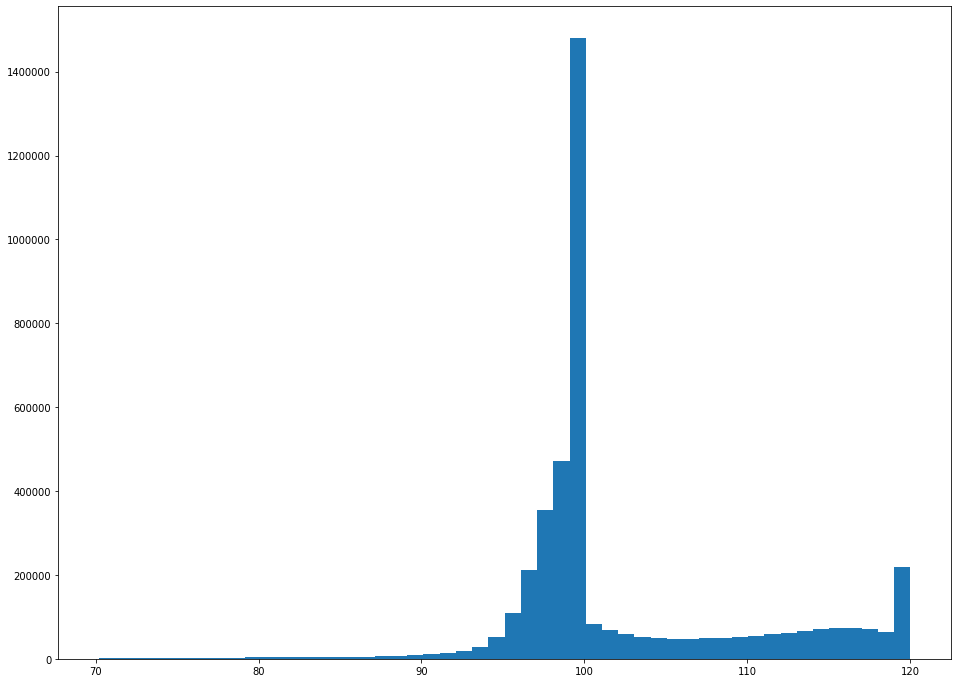

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,12))
df.speed[(df.speed.notna()) & (df.speed > 70)].hist(bins = 50, grid = False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4727520 entries, 2011-01-03 00:00:00 to 2019-12-29 23:59:00
Data columns (total 2 columns):
speed    float64
flow     float64
dtypes: float64(2)
memory usage: 108.2 MB


In [0]:
df2 = df.resample('M').agg({'speed': np.mean, 'flow': np.sum})

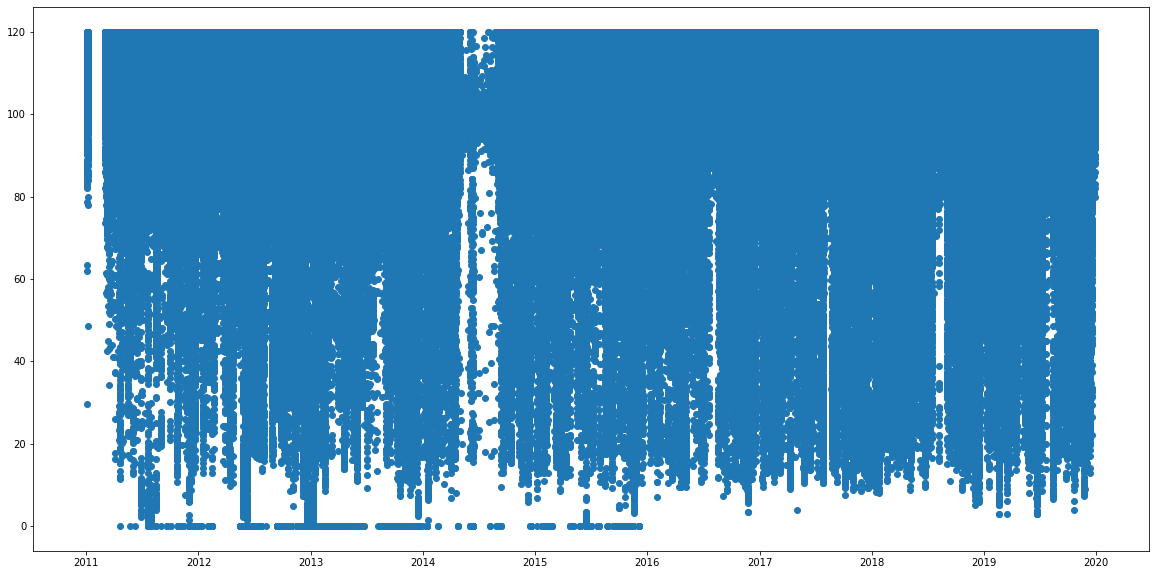

In [36]:
plt.figure(figsize=(20,10))
plt.scatter(df.index, df.speed)

In [40]:
df['null'] = np.where(df.speed.isna(), 1, np.nan)
df['timestamp'] = df.index
df.groupby(pd.Grouper(key='timestamp', freq='M'))['null'].sum()

timestamp
2011-01-31   37730.00
2011-02-28   40320.00
2011-03-31    5254.00
2011-04-30   11189.00
2011-05-31    2572.00
2011-06-30    4030.00
2011-07-31    2813.00
2011-08-31    6074.00
2011-09-30    3487.00
2011-10-31    3726.00
2011-11-30    4609.00
2011-12-31    4616.00
2012-01-31    9167.00
2012-02-29    5494.00
2012-03-31    2159.00
2012-04-30    2367.00
2012-05-31     113.00
2012-06-30     661.00
2012-07-31   14986.00
2012-08-31     821.00
2012-09-30     102.00
2012-10-31    9383.00
2012-11-30    3896.00
2012-12-31    2872.00
2013-01-31    2980.00
2013-02-28    1266.00
2013-03-31    1875.00
2013-04-30    1038.00
2013-05-31    2220.00
2013-06-30    2176.00
2013-07-31    1268.00
2013-08-31    1380.00
2013-09-30    2253.00
2013-10-31    3043.00
2013-11-30    4107.00
2013-12-31    3655.00
2014-01-31    4773.00
2014-02-28    3894.00
2014-03-31    2246.00
2014-04-30    1537.00
2014-05-31   44281.00
2014-06-30   39665.00
2014-07-31   44356.00
2014-08-31   43320.00
2014-09-30    1591.00
